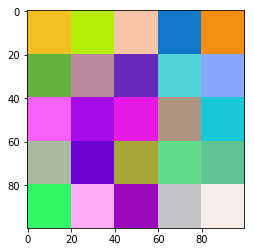

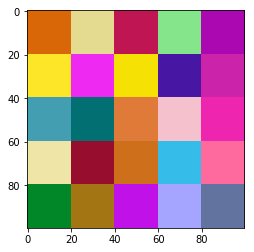

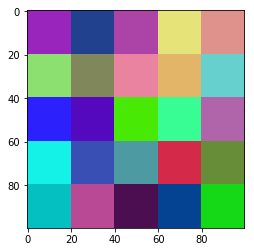

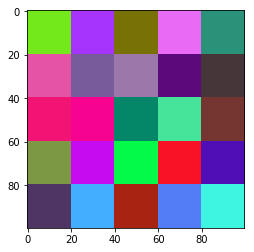

In [1]:
from PIL import Image
import random
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow, show, clf

%matplotlib inline


sq_size = 20
num_squares = 5
im_size = sq_size * num_squares

im = Image.new('RGB', (im_size, im_size), color = 'white')

pix = im.load()

#Create new colourful boxes 4 times
for _ in range(4):

    startx, starty = 0, 0

    #move to the right place to plot each small square
    for i in range(num_squares):
        startx += sq_size
        for j in range(num_squares):
            starty += sq_size
            rshade = np.random.randint(0, 256)
            gshade = np.random.randint(0, 256)
            bshade = np.random.randint(0, 256)

            #plot each small square
            for x in range(sq_size):
                for y in range(sq_size):
                    value = (rshade, gshade, bshade)
                    pix[(startx + x) % im_size, (starty + y) % im_size] = value 

    plt.imshow(im)
    plt.show()

    time.sleep(.5)

Traceback (most recent call last):
  File "/Users/alexfreeman/Documents/Dev/AnacondaInstall/anaconda/envs/py3-env/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 387, in process
    proxy(*args, **kwargs)
  File "/Users/alexfreeman/Documents/Dev/AnacondaInstall/anaconda/envs/py3-env/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 227, in __call__
    return mtd(*args, **kwargs)
  File "/Users/alexfreeman/Documents/Dev/AnacondaInstall/anaconda/envs/py3-env/lib/python3.6/site-packages/matplotlib/animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'
Traceback (most recent call last):
  File "/Users/alexfreeman/Documents/Dev/AnacondaInstall/anaconda/envs/py3-env/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 387, in process
    proxy(*args, **kwargs)
  File "/Users/alexfreeman/Documents/Dev/AnacondaInstall/anaconda/envs/py3-env/lib/pytho

<IPython.core.display.Javascript object>


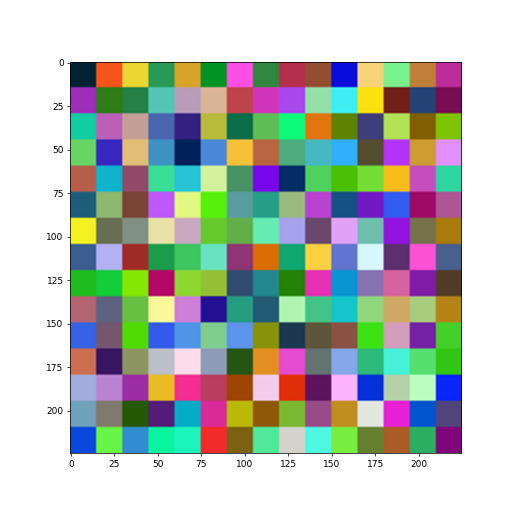

In [5]:
from PIL import Image
import random
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow, show
import matplotlib.animation as animation

%matplotlib notebook

def next_shape(im, num_squares, sq_size):
    pix = im.load()

    #initialise plot location
    startx, starty = 0, 0

    for i in range(num_squares):
        startx += sq_size
        for j in range(num_squares):
            starty += sq_size
            rshade = np.random.randint(0, 256)
            gshade = np.random.randint(0, 256)
            bshade = np.random.randint(0, 256)

            for x in range(sq_size):
                for y in range(sq_size):
                    value = (rshade, gshade, bshade)
                    pix[(startx + x) % im_size, (starty + y) % im_size] = value 

    #return list of pixel tuples
    return list(im.getdata())


# First set up the figure, the axis, and the plot element we want to animate
sq_size = 15
num_squares = 15

#create a figure to animate
fig = plt.figure(figsize=(8, 8))
#plt.tight_layout()

#create the image withi the figure to animate
im_size = sq_size * num_squares
im = Image.new('RGB', (im_size, im_size))


#create a list to store all the images in the format of a list of RGB pixels
im_list_pix = []

#generate a bunch of images in the form of a list of RGB pixels
for pic in range(10):
    im_list_pix.append(next_shape(im, num_squares, sq_size))
    
#create a list to store images converted from RGB pixel tuples to image format
img_array = []

#convert list of pixel tuples back to image
for i, v in enumerate(im_list_pix):
    im = Image.new('RGB', (im_size, im_size))
    #put the pixel data into the image container
    im.putdata(im_list_pix[i])
    
    im = plt.imshow(im, interpolation='mitchell')
    img_array.append([im])  
    
ani = animation.ArtistAnimation(fig, img_array, interval=500)

plt.show()

In [729]:
ani.save('line.gif', dpi=80, writer='imagemagick')

In [731]:
!pwd

/Users/alexfreeman/Documents/dev/python/playground


<IPython.core.display.Javascript object>


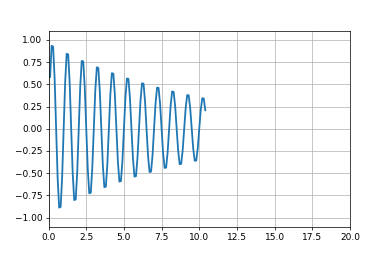

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib notebook

def data_gen(t=0):
    cnt = 0
    while cnt < 150:
        cnt += 1
        t += 0.1
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)


def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 10)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []


def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

ani = animation.FuncAnimation(fig, run, data_gen, blit=False, interval=15,
                              repeat=False, init_func=init)

#animation.FuncAnimation(fig, func, frames=None, init_func=None, fargs=None, save_count=None, **kwargs
                                   
                                   
plt.show()

<IPython.core.display.Javascript object>


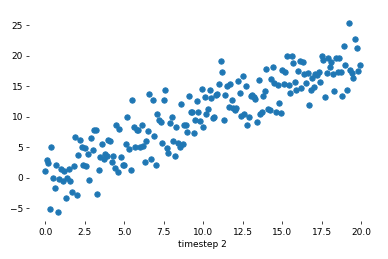

fig size: 72.0 DPI, size in inches [6. 4.]


In [4]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
fig.set_tight_layout(True)

# Query the figure's on-screen size and DPI. Note that when saving the figure to
# a file, we need to provide a DPI for that separately.
print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))

# Plot a scatter that persists (isn't redrawn) and the initial line.
x = np.arange(0, 20, 0.1)
ax.scatter(x, x + np.random.normal(0, 3.0, len(x)))
line, = ax.plot(x, x - 5, 'r-', linewidth=2)

def update(i):
    label = 'timestep {0}'.format(i)
    print(label)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    line.set_ydata(x - 5 + i)
    ax.set_xlabel(label)
    return line, ax

if __name__ == '__main__':
    # FuncAnimation will call the 'update' function for each frame; here
    # animating over 10 frames, with an interval of 200ms between frames.
    anim = FuncAnimation(fig, update, frames=np.arange(0, 10), interval=200)
    if len(sys.argv) > 1 and sys.argv[1] == 'save':
        anim.save('line.gif', dpi=80, writer='imagemagick')
    else:
        # plt.show() will just loop the animation forever.
        plt.show()

<IPython.core.display.Javascript object>


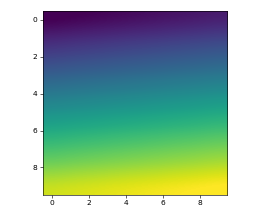

In [740]:
arr = np.arange(100).reshape((10, 10))

#plt.close('all')
fig = plt.figure(figsize=(5, 4))

ax = plt.subplot(111)
im = ax.imshow(arr, interpolation="lanczos")

plt.tight_layout()

In [737]:
arr

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])